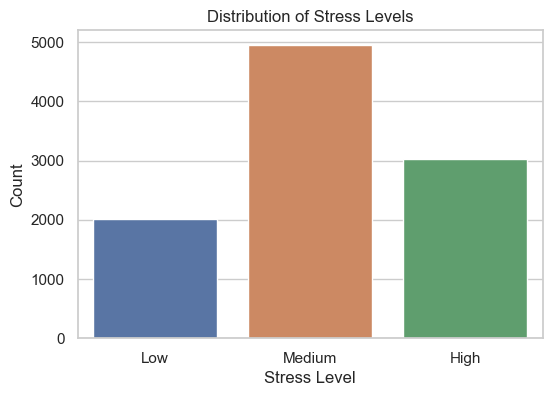

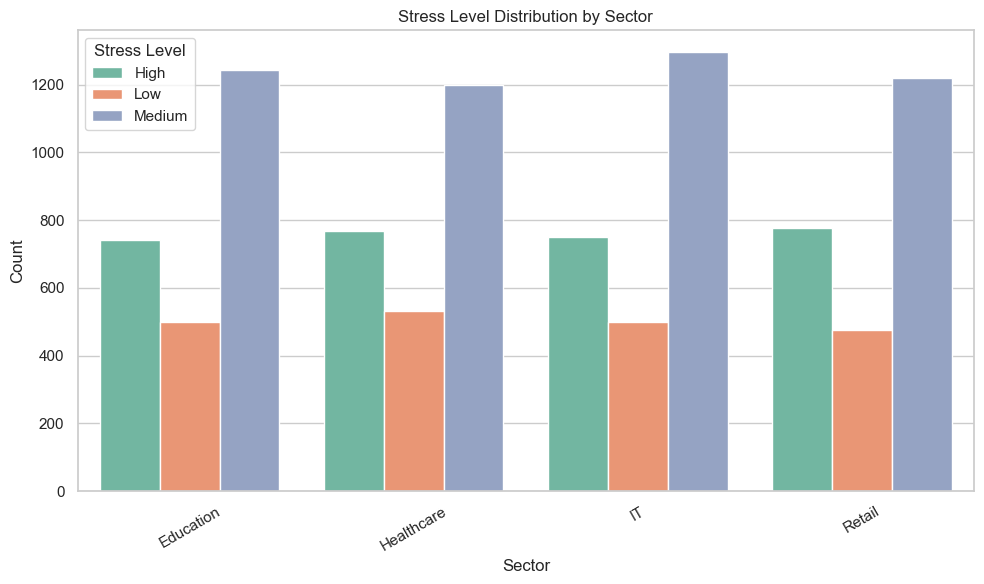

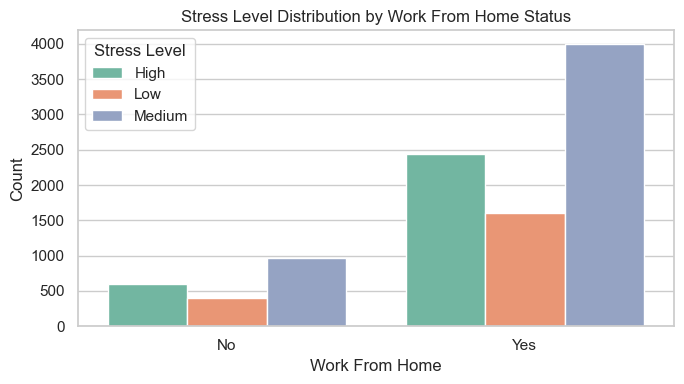

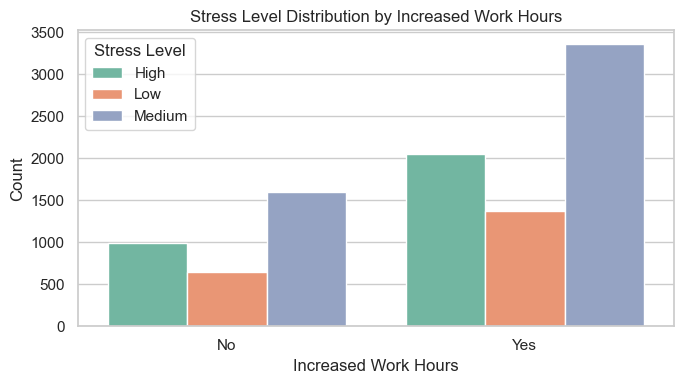

🔍 Total null values in dataset: 0


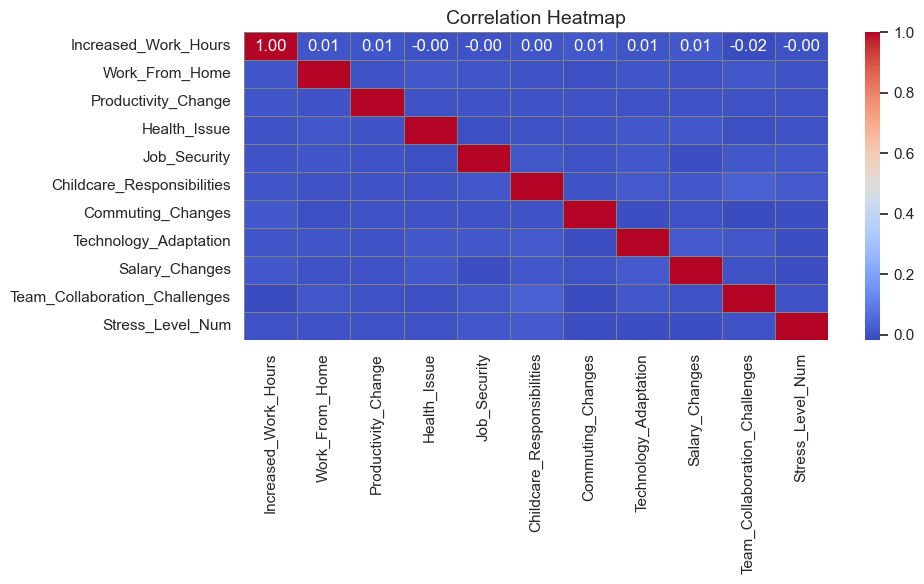

In [43]:

# 📊 COVID-19 Impact on Working Professionals – EDA
import numpy as np

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from pandas.api.types import CategoricalDtype

sns.set(style="whitegrid")

# Load the dataset from full path
csv_path = r'C:\Users\manvi\Documents\covid-visual-analytics\data\covid_impact_on_work new.csv'
df = pd.read_csv(csv_path)
# Map stress level to numbers
stress_map = {'Low': 1, 'Medium': 2, 'High': 3}
df['Stress_Level_Num'] = df['Stress_Level'].map(stress_map)



# Plot 1: Distribution of Stress Levels
plt.figure(figsize=(6,4))
sns.countplot(x='Stress_Level', data=df, order=["Low", "Medium", "High"])
plt.title("Distribution of Stress Levels")
plt.xlabel("Stress Level")
plt.ylabel("Count")
plt.show()







# Group by Sector and Stress Level
grouped_counts = df.groupby(['Sector', 'Stress_Level']).size().reset_index(name='Count')

# Plot grouped bar chart
plt.figure(figsize=(10, 6))
sns.barplot(x='Sector', y='Count', hue='Stress_Level', data=grouped_counts, palette='Set2')

plt.title("Stress Level Distribution by Sector")
plt.xlabel("Sector")
plt.ylabel("Count")
plt.xticks(rotation=30)
plt.legend(title="Stress Level")
plt.tight_layout()
plt.show()


#plot3
# Create a grouped count DataFrame
grouped_counts = df.groupby(['Work_From_Home', 'Stress_Level']).size().reset_index(name='Count')

# Map WFH 0/1 to labels
grouped_counts['Work_From_Home'] = grouped_counts['Work_From_Home'].map({0: 'No', 1: 'Yes'})

# Plot grouped bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Work_From_Home', y='Count', hue='Stress_Level', data=grouped_counts, palette='Set2')

plt.title("Stress Level Distribution by Work From Home Status")
plt.xlabel("Work From Home")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.tight_layout()
plt.show()


# Plot 4: Stress Level by Increased Work Hours (0 = No, 1 = Yes)
# Group counts by Increased_Work_Hours and Stress_Level
grouped_counts = df.groupby(['Increased_Work_Hours', 'Stress_Level']).size().reset_index(name='Count')

# Map 0 and 1 to text labels for clarity
grouped_counts['Increased_Work_Hours'] = grouped_counts['Increased_Work_Hours'].map({0: 'No', 1: 'Yes'})

# Plot the grouped bar chart
plt.figure(figsize=(7, 4))
sns.barplot(x='Increased_Work_Hours', y='Count', hue='Stress_Level', data=grouped_counts, palette='Set2')

plt.title("Stress Level Distribution by Increased Work Hours")
plt.xlabel("Increased Work Hours")
plt.ylabel("Count")
plt.legend(title="Stress Level")
plt.tight_layout()
plt.show()



#print("🔍 Total null values in dataset:", df.isnull().sum().sum())
#  Optional: Correlation heatmap for numeric features
#plt.figure(figsize=(10,6))
#sns.heatmap(df.corr(numeric_only=True), annot=True, cmap='coolwarm')
#plt.title("Correlation Heatmap")
#plt.show()


# Convert Stress_Level to numeric
#df["Stress_Level_Num"] = df["Stress_Level"].map({"Low": 1, "Medium": 2, "High": 3})

# Compute correlation matrix
corr = df.corr(numeric_only=True)

# ✅ Drop only fully-NaN rows/columns
corr = corr.dropna(axis=0, how='all').dropna(axis=1, how='all')

# ✅ Only continue if matrix is not empty
if not corr.empty:
    plt.figure(figsize=(10, 6))
    sns.heatmap(corr, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5, linecolor='gray')
    plt.title("Correlation Heatmap", fontsize=14)
    plt.tight_layout()
    plt.show()
else:
    print("⚠️ Correlation matrix is empty. No numeric data available.")
